##### Nushath MNM
##### 190423H
## Assignment 2

In [6]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib.patches import Circle

In [3]:
#Q1
N = 100
half_n = N//2
r = 10
s = r /16
t = np.random.uniform(0 , 2*np.pi , half_n)
n = s*np.random.randn(half_n)
x , y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n , 1), y.reshape(half_n , 1)))
m, b = -1, 2
x = np.linspace(-12, 12 , half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n , 1) , y.reshape(half_n , 1)))
X = np.vstack((X_circ , X_line))

In [3]:
def findRandom(data, n):
    count = 0
    sample = []

    while count < n:
        index = np.random.randint(len(data))
        x = data[index][0]
        y = data[index][1]

        if (x, y) not in sample:
            sample.append((x, y))
            count += 1

    return sample

In [4]:
def getCircle(p1, p2, p3):

    X = np.array([[p2[0] - p1[0], p2[1] - p1[1]], [p3[0] - p2[0], p3[1] - p2[1]]]) 
    Y = np.array([[p2[0]**2 - p1[0]**2 + p2[1]**2 - p1[1]**2], [p3[0]**2 - p2[0]**2 + p3[1]**2 - p2[1]**2]])		

    x, y = np.dot(inv(X), Y) / 2
    x, y = x[0], y[0]
    r = np.sqrt((x - p1[0])**2 + (y - p1[1])**2)

    return (x, y, r)

In [5]:
def checkCircle(circle, data, threshold):
    inliers = []
    x = circle[0]
    y = circle[1]
    r = circle[2]

    X = data[:, 0]
    Y = data[:, 1]
    error = 0

    for i in range(len(X)):
        d = np.sqrt((X[i] - x)**2 + (Y[i] - y)**2)

        if abs(d - r) <= threshold:
            inliers.append([X[i], Y[i]])
            error += abs(d - r)
    
    return inliers, error

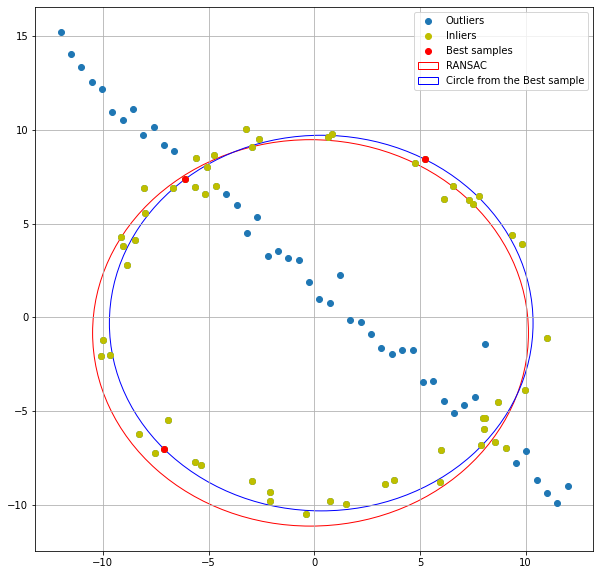

In [6]:
x_data = X[:, 0]
y_data = X[:, 1]
N = 35
inlier_threshold = r/8
inlier_count_threshold = 50
best_model = [0, 0, 999999, []]

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(X[:,0], X[:, 1], 'o', label='Outliers')
ax.grid(True)


for i in range(N):
    sample = findRandom(X, 3)
    initial_circle = getCircle(sample[0], sample[1], sample[2])

    if abs(r - initial_circle[2]) > 1.5*r:
        continue
    
    inliers, toal_distance = checkCircle(initial_circle, X, inlier_threshold)
    
    if len(inliers) < inlier_count_threshold:
        continue

    inlier_sample = findRandom(inliers, 3)
    circle = getCircle(inlier_sample[0], inlier_sample[1], inlier_sample[2])
    inliers, toal_distance = checkCircle(initial_circle, X, inlier_threshold)
    if len(inliers) < inlier_count_threshold:
        continue
    if len(best_model[-1]) < len(inliers):
        best_model = [circle, initial_circle, sample, toal_distance, inliers]
    elif len(best_model[-1]) == len(inliers):
        if best_model[3] > toal_distance:
            best_model = [circle, initial_circle, sample, toal_distance, inliers]

if len(best_model[-1]) == 0:
    print("No best model found")

else:
    inliers = np.array(best_model[-1])
    ax.plot(inliers[:, 0], inliers[:, 1], 'o',color= 'y', label='Inliers')

    best_samples = np.array(best_model[2])
    ax.plot(best_samples[:,0], best_samples[:, 1], 'o', color= 'r', label='Best samples')

    a, b, r = best_model[0][0], best_model[0][1], best_model[0][2]
    circle = Circle((a, b), radius=r, color='r', fc='y', fill=False, label='RANSAC')
    ax.add_patch(circle)

    a, b, r = best_model[1][0], best_model[1][1], best_model[1][2]
    init_circle = Circle((a, b), radius=r, color='b', fc='y', fill=False, label='Circle from the Best sample')
    ax.add_patch(init_circle)

ax.legend()

In [32]:
def click_point(event, x, y):
    if event == cv.EVENT_LBUTTONDOWN:
        print(x, ' ', y)

def overlay_image(source, des, points_s, points_d):
    h, status = cv.findHomography(points_s, points_d)
    output = cv.warpPerspective(source, h, (des.shape[1], des.shape[0]))
    return cv.add(output, des)

Error in sys.excepthook:
Traceback (most recent call last):
  File "c:\Python39\cv\lib\site-packages\IPython\core\interactiveshell.py", line 1934, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Python39\cv\lib\site-packages\IPython\core\interactiveshell.py", line 1936, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "c:\Python39\cv\lib\site-packages\IPython\core\ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Python39\cv\lib\site-packages\IPython\core\ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "c:\Python39\cv\lib\site-packages\IPython\core\ultratb.py", line 851, in structured_traceback
    assert etb is not None
AssertionError

Original exception was:
T

(960, 1920, 3)
(2400, 3840, 3)


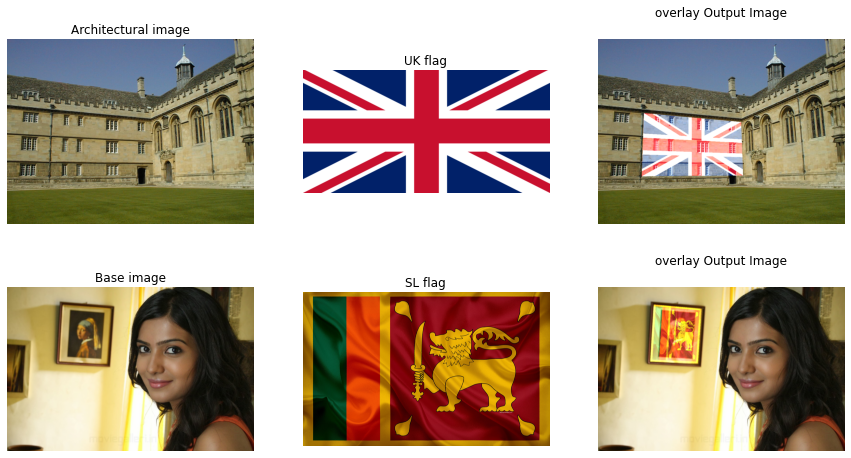

In [33]:
#Q2

img1 = cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignment 2\EN2550---Image-Processing-Assignment-2\images\003.jpg",cv.IMREAD_COLOR)
flag = cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignment 2\EN2550---Image-Processing-Assignment-2\images\Flag_of_the_United_Kingdom.svg.png",cv.IMREAD_ANYCOLOR)
img2 = cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignment 2\EN2550---Image-Processing-Assignment-2\images\samantha-ruth-prabhu-new-upcoming-movie-2016-2017.jpg",cv.IMREAD_COLOR)
flag2 = cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignment 2\EN2550---Image-Processing-Assignment-2\images\srilanka.jpg",cv.IMREAD_ANYCOLOR)

fig, ax = plt.subplots(2, 3, figsize=(15, 8))
ax[0, 0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
ax[0, 0].title.set_text('Architectural image')
ax[0, 0].axis('off')


ax[0, 1].imshow(cv.cvtColor(flag, cv.COLOR_BGR2RGB))
ax[0, 1].title.set_text('UK flag')
ax[0, 1].axis('off')


ax[1, 0].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax[1, 0].title.set_text('Base image')
ax[1, 0].axis('off')


ax[1, 1].imshow(cv.cvtColor(flag2, cv.COLOR_BGR2RGB))
ax[1, 1].title.set_text('SL flag')
ax[1, 1].axis('off')


cv.imshow('image', img1)
cv.setMouseCallback('image', click_point)
cv.waitKey(0)
cv.destroyAllWindows()

cv.imshow('image', img2)
cv.setMouseCallback('image', click_point)
cv.waitKey(0)
cv.destroyAllWindows()


print(flag.shape)
print(flag2.shape)


pts_flag = np.array([[0, 0], [1919, 0], [1919, 955], [0, 955]])
pts_flag2 = np.array([[0, 0], [3839, 0], [3839, 2399], [0, 2399]])


pts_img1 = np.array([[593, 344], [190, 307], [181, 568], [601, 565]])
pts_img2 = np.array([[289, 95], [536, 118],  [517, 400], [270, 390]])

superimposed1 = overlay_image(flag, img1, pts_flag, pts_img1)
superimposed2 = overlay_image(flag2, img2, pts_flag2, pts_img2)

ax[0, 2].imshow(cv.cvtColor(superimposed1, cv.COLOR_BGR2RGB))
ax[0, 2].title.set_text('overlay Output Image')
ax[0, 2].axis('off')
ax[0, 2].xaxis.tick_top()

ax[1, 2].imshow(cv.cvtColor(superimposed2, cv.COLOR_BGR2RGB))
ax[1, 2].title.set_text('overlay Output Image')
ax[1, 2].axis('off')
ax[1, 2].xaxis.tick_top()

In [34]:
def homogrpahy(src_img, dst_img):
    sift = cv.SIFT_create()
    kp1, des1 = sift.detectAndCompute(src_img, None)
    kp2, des2 = sift.detectAndCompute(dst_img, None)

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k = 2)
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)

    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
    H, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 0.95)

    return H

def match_SIFT(img1, img2):
    sift = cv.SIFT_create()
    kp1, des1 = sift.detectAndCompute(img1, None)
    kp2, des2 = sift.detectAndCompute(img2, None)

    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50) 
    flann = cv.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k = 2)
    matchesMask = [[0,0] for i in range(len(matches))]

    for i,(m,n) in enumerate(matches):
        if m.distance < 0.7*n.distance:
            matchesMask[i] = [1,0]
            draw_params = dict(matchColor = (0, 255, 0),
            singlePointColor = (255, 0, 0),
            matchesMask = matchesMask,
            flags = cv.DrawMatchesFlags_DEFAULT)
                    
    img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)

    return img3

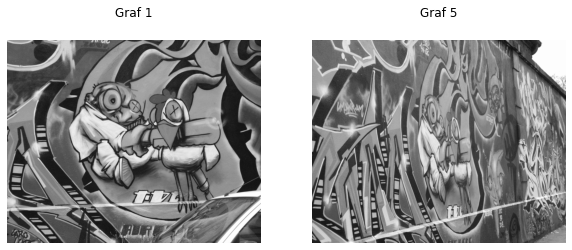

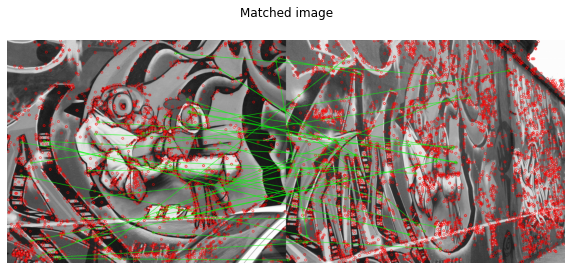

In [35]:
img1 = cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignment 2\EN2550---Image-Processing-Assignment-2\images\graf\img1.ppm", cv.IMREAD_GRAYSCALE)
assert img1 is not None

img5 = cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignment 2\EN2550---Image-Processing-Assignment-2\images\graf\img5.ppm", cv.IMREAD_GRAYSCALE)


fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img1, cmap = 'gray', vmin = 0, vmax = 255)
ax[0].title.set_text('Graf 1')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(img5, cmap = 'gray', vmin =0, vmax=255)
ax[1].title.set_text('Graf 5')
ax[1].axis('off')
ax[1].xaxis.tick_top()

matched = match_SIFT(img1, img5)

fig, ax = plt.subplots(figsize = (10, 10))
ax.imshow(matched, cmap = 'gray', vmin = 0, vmax = 255)
ax.title.set_text('Matched image')
ax.axis('off')
ax.xaxis.tick_top()

In [36]:
#b
H = np.identity(3)

for i in range(4):
    src_name = str(i + 1)+'.ppm'
    src_img = cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignment 2\EN2550---Image-Processing-Assignment-2\images\graf\img"+src_name, cv.IMREAD_GRAYSCALE)
    assert src_img is not None

    dst_name = str(i + 2)+'.ppm'
    dst_img = cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignment 2\EN2550---Image-Processing-Assignment-2\images\graf\img"+dst_name, cv.IMREAD_GRAYSCALE)
    assert dst_img is not None

    H = np.matmul(homogrpahy(src_img, dst_img), H)

print(H)

[[ 6.17063288e-01  4.40496737e-02  2.21786468e+02]
 [ 2.18125850e-01  1.13380008e+00 -2.16073403e+01]
 [ 4.86041097e-04 -6.91886354e-05  9.92859293e-01]]


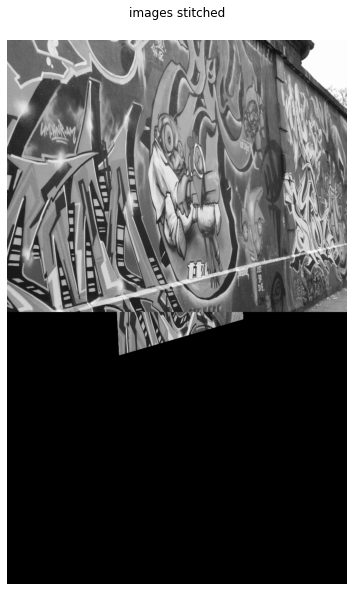

In [37]:
#c)
dst = cv.warpPerspective(src_img, H, (dst_img.shape[1], dst_img.shape[0] + src_img.shape[0])) 
dst[0:dst_img.shape[0], 0:dst_img.shape[1]] = dst_img

fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(dst, cmap = 'gray', vmin = 0, vmax = 255)
ax.title.set_text('images stitched')
ax.axis('off')
ax.xaxis.tick_top()